### Una moneda con memoria

Supongamos que tenemos una moneda que se acuerda de lo que salió en el volado anterior. Específicamente, si $X_{n}$ denota el resultado de $n$-ésimo volado y denotamos como ``0'' al hecho de que aparezca águila, vamos a suponer que 
\begin{equation}
P[X_{n}=1|X_{n-1}=0]=\theta \mbox{ y } P[X_{n}=0|X_{n-1}=0]=\mu, \hspace{1cm}(1)\nonumber
\end{equation}
con $\theta, \mu \in (0,1)$. ¿Cuál es la probabilidad de obtener un águila en un lanzamiento cualquiera, independientemente de lo que pasó en el volado anterior?

Definimos entonces 
\begin{equation*}
X_{n}=\mbox{El resultado del  $n$-ésimo volado}.
\end{equation*}
Como estamos denotando a  "0" al hecho de que aparezca águila entonces al hecho de salga sol la denotamos como "1".
De este modo, las variables aleatorias $X_{n}\in \{0,1\}$ y esto para cada $n\in N$.\\
Por hipótesis tenemos una moneda que se acuerda de lo que salió en el volado anterior, lo que nos sugiere que podemos 
``interpretar'' a la sucesión $\{X_{n}\}_{n\geq 1}$ como una cadena de Markov y con espacio de estados $S=\{0, 1\}$.\\
Luego, calculemos la matriz de transición de esta cadena. Para esto, ocuparemos las probabilidades de transición dadas en la expresión anterior y también usaremos que la matriz de transición debe ser una matriz estocástica. Así que la matriz buscada es 

\begin{equation}
P=\left(\begin{matrix}
1-\theta&\theta\\
\mu& 1-\mu
\end{matrix}\right). \hspace{1cm}(2) \nonumber
\end{equation}
Para una cadena de Markov en general se sabe que podemos encontrar la distribución de cada variable $X_{n}$, $n\in N\setminus\{0\}$ si conocemos su matrix de transición y la distribución de $X_{0}$. Y se puede calcular como 
\begin{equation}
P[X_{n}=y]=\sum_{x\in S}P(X_{0}=x)p^{n}(x,y),   \hspace{1cm}(3) \nonumber
\end{equation}
donde $S$ es el espacio de estado y $p^{n}(x,y)=P(X_{n}=y|X_{0}=x)$. Pero, la expresión enterior es equivalente a 


\begin{equation}
P[X_{n}=y]=({\bf{\pi_{0}}}\hat{P}^{n})_{y}, \hspace{1cm}(4)\nonumber
\end{equation}
dode ${\bf{\pi_{0}}}=[P(X_{0}=0), \ldots,P(X_{0}=k)]$ (suponiendo que el espacio de estados es $S=\{0, \ldots, k\}$) y $\hat{P}$ es la matriz de transición de la cadena.\\
Regresando a nuestro problema, usando que  ${\bf{\pi_{0}}}=[P(X_{0}=0), P(X_{0}=1)]$ y Ec(2), entonces de 4 se sigue que 
\begin{equation}
P(X_{n}=0)=\left([P(X_{0}=0), P(X_{0}=1)]\left(\begin{matrix}
1-\theta&\theta\\
\mu& 1-\mu
\end{matrix}\right)^{n}\right)_{0}. \hspace{1cm}(5)
\end{equation}
Resolviendo la ecuación 5 se sigue que 
\begin{equation}
P(X_{n}=0)=\frac{\mu}{\mu+\theta}+(1-\theta-\mu)^{n}\left(P(X_{0}=0)-\frac{\mu}{\mu+\theta}\right).\hspace{1cm}(6)\nonumber
\end{equation}
Análogamente se puede demostrar que 

\begin{equation}
P(X_{n}=1)=\frac{\theta}{\mu+\theta}+(1-\theta-\mu)^{n}\left(P(X_{0}=1)-\frac{\theta}{\mu+\theta}\right). \hspace{1cm}(7)
\end{equation}

Observemos que, para calcular tanto $P(X_{n}=0)$  como  $P(X_{n}=0)$  necesitamos conocer la distribución de $X_{0}$.
Como $\theta, \mu \in (0,1)$ entonces $\lim_{n\to \infty}(1-\theta-\mu)^{n}=0$. Así que de Ec.(5) y Ec(6) se infiere que 
\begin{equation}
\lim_{n\to \infty}P(X_{n}=0)=\frac{\mu}{\mu+\theta} \mbox{ y } \lim_{n\to \infty}P(X_{n}=1)=\frac{\theta}{\mu+\theta},\hspace{1cm}(8)\nonumber
\end{equation}
y esto pasa independientemente de la distribución de $X_{0}$.\\
De esta manera, si proponemos que ${\bf{\pi_{0}}}=(\frac{\mu}{\mu+\theta},\frac{\theta}{\mu+\theta})$ (qué es lo que nos sugiere la
expresión 8 entonces en Ecs.(6 y 7) se sigue que, 
\begin{eqnarray}
P(X_{n}=0)&=&\frac{\mu}{\mu+\theta}+(1-\theta-\mu)^{n}(0)\nonumber\\
&=&\frac{\mu}{\mu+\theta} \mbox{ y}\\
P(X_{n}=1)&=&\frac{\theta}{\mu+\theta}+(1-\theta-\mu)^{n}0\nonumber\\
&=&\frac{\theta}{\mu+\theta}.
\end{eqnarray}
Y las probabilidades $P(X_{n}=0)$ y $P(X_{n}=1)$ ya no dependen de la $n$.\\
Si suponemos que $(\mu, \theta) = (0.42, 0.35)$, entonces $P(X_{n}=0)=\frac{0.42}{0.42+0.35}=0.54$ y $P(X_{n}=1)=\frac{0.35}{0.42+0.35}=0.459$, esto siempre y cuando si proponemos  ${\bf{\pi_{0}}}=(\frac{\mu}{\mu+\theta},\frac{\theta}{\mu+\theta})$.\\
Ahora ya sabemos a que mas o menos debemos de llegar si resolvemos el problema numéricamente.

### Simulación

In [2]:
estados=c('0', '1')
pi0=c(0.65,0.35) # distribucion inicial
names(pi0) <- estados
p<- rbind(c(0.65,0.35), c(.42, .58))
dimnames(p) <- list(estados, estados)
p

,0,1
0,0.65,0.35
1,0.42,0.58


In [3]:
func.inic <- cumsum(pi0)
func.act <- t(apply(p, 1, cumsum))

In [4]:
n <-6523
U <- runif(n) 
X <- numeric(n) * NA 
j = 1; while(U[1] > func.inic[j]) j = j + 1;
X[1] <- estados[j]
for (i in 2:n) {
j = 1; while(U[i] > func.act[X[i - 1], j]) j = j + 1;
X[i] <- estados[j]
}

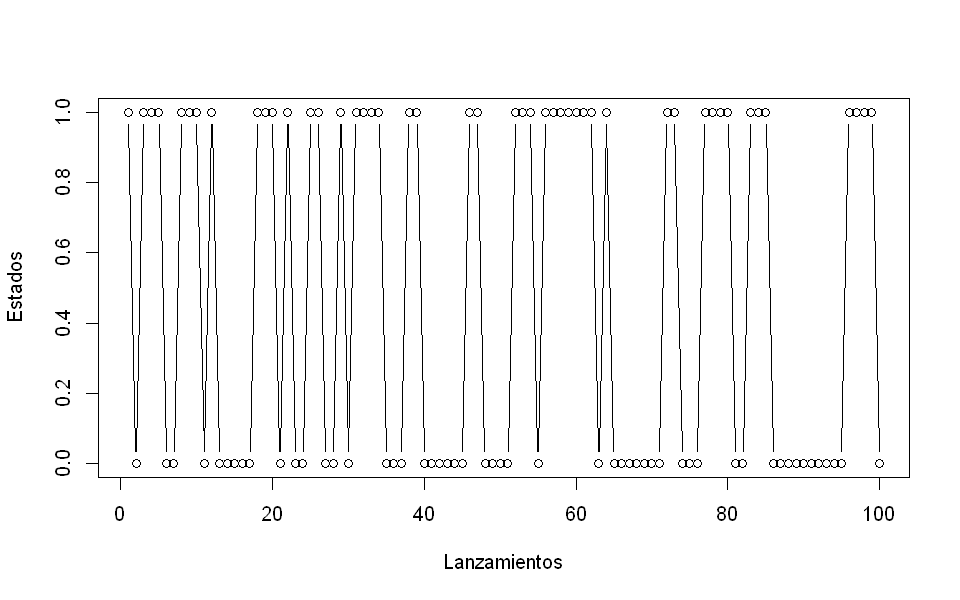

In [5]:
options(repr.plot.width=8, repr.plot.height=5)
plot(X[1:100],type="b",xlab="Lanzamientos",ylab="Estados")